In [2]:
!pip install opencv-python

     |████████████████████████████████| 46.4 MB 1.8 MB/s eta 0:00:01     |█████████████                   | 18.7 MB 986 kB/s eta 0:00:29     |██████████████████████████████▋ | 44.5 MB 3.5 MB/s eta 0:00:01


In [23]:
!pip install pybboxes

In [121]:
!conda install -c fastchan fastai

Solving environment: done

## Package Plan ##

  environment location: /Users/hectorarielaragonoliva/opt/anaconda3

  added / updated specs:
    - fastai


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    catalogue-2.0.8            |   py39h6e9494a_0          32 KB  fastchan
    conda-22.9.0               |   py39h6e9494a_0         975 KB  fastchan
    cymem-2.0.6                |   py39h9fcab8e_2          34 KB  fastchan
    cython-blis-0.7.8          |   py39h15b18c7_0         5.2 MB  fastchan
    fastai-2.7.10              |             py_0         184 KB  fastchan
    fastcore-1.5.27            |             py_0          59 KB  fastchan
    fastdownload-0.0.7         |             py_0          17 KB  fastchan
    fastprogress-1.0.3         |             py_0          17 KB  fastchan
    langcodes-3.3.0            |     pyhd8ed1ab_0         156 KB  fastchan
    murmurhash-1.0.7     

In [122]:
!pip install fastai --upgrade
!pip install pyyaml

     |████████████████████████████████| 2.7 MB 949 kB/s eta 0:00:01
     |████████████████████████████████| 58 kB 1.1 MB/s eta 0:00:01
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.1.0
    Uninstalling smart-open-5.1.0:
      Successfully uninstalled smart-open-5.1.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.2
    Uninstalling pydantic-1.10.2:
      Successfully uninstalled pydantic-1.10.2


In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import pandas as pd
import numpy as np
from fastai import *
from fastai.vision.all import *
from fastai.imports import *
import yaml, cv2, os
from torchvision import transforms as T
from torchvision.transforms import functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt
import unidecode
import cv2
import re
from __future__ import division
import time
import numpy as np
#from util import *
import argparse
import os 
import os.path as osp
#from darknet import Darknet
import pickle as pkl
import random
import pybboxes as pbx

In [2]:
fl = open('descarga_img/0011F.txt', 'r')
data = fl.readlines()
fl.close()

In [3]:
img = cv2.imread('descarga_img/0011F.jpg')
dh, dw, _ = img.shape

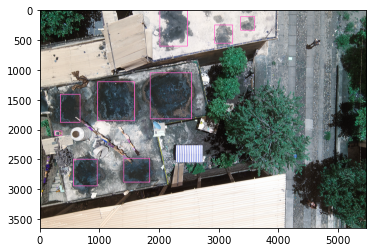

In [4]:
import matplotlib.pyplot as plt
for dt in data:
    _, x, y, w, h = map(float, dt.split(' '))

    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    #colour2 = (R,G,B) 
    cv2.rectangle(img, (l, t), (r, b), (900, 100, 200), 9)

plt.imshow(img)
plt.show()

In [5]:
a,b,c,d,e =map(float,data[0].split(' '))

In [6]:
H, W = img.shape[:2]

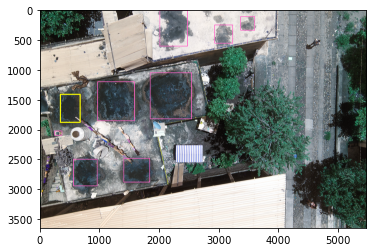

In [12]:
yolo_normalized = (b, c, d, e) 

H, W = img.shape[:2]

box_voc = pbx.convert_bbox(yolo_normalized, from_type="yolo", to_type="voc", image_size=(W,H))
cv2.rectangle(img, (box_voc[0], box_voc[1]), (box_voc[2], box_voc[3]), (900, 600, 0), 18)
plt.imshow(img)
plt.show()

In [10]:
# obj_5etiq_v2.names
def load_classes(namesfile):
    fp = open(namesfile, "r")
    names = fp.read().split("\n")
    return names

clases=load_classes('obj_5etiq_v2.names')
clases

['charcos', 'cubetas', 'llanta', 'tinaco', 'maceta']

In [11]:
pd.read_csv('filestxt/0011F.txt',sep=" ",header=None)

,0,1,2,3,4
0,0,0.092381,0.450952,0.060317,0.128571
1,0,0.232698,0.418571,0.112381,0.178857
2,0,0.400317,0.393714,0.126857,0.211429
3,0,0.561841,0.110571,0.055238,0.084000
4,0,0.408889,0.083143,0.084571,0.165143
5,1,0.056124,0.564952,0.022316,0.019810
6,0,0.296148,0.734872,0.079271,0.108796
7,0,0.138627,0.745739,0.072237,0.122182
8,0,0.635277,0.061634,0.042962,0.062658


In [13]:
files = os.listdir('filestxt/')

In [14]:
files.remove('.ipynb_checkpoints')

In [15]:
df_0 =[]
for f in files:
    txt = re.sub('.txt','.jpg',f)
    df_temp = pd.read_csv('filestxt/'+f,sep=" ",header=None)
    df_temp.columns = ['tag','w','x','y','z']
    df_temp['imagen'] = txt
    df_0.append(df_temp)
    
df = pd.concat(df_0,axis=0,ignore_index=True)
df

,tag,w,x,y,z,imagen
0,1,0.322836,0.325942,0.011049,0.025167,0054F.jpg
1,2,0.242454,0.108948,0.022059,0.023069,0111F.jpg
2,3,0.738129,0.144532,0.060228,0.063797,0111F.jpg
3,4,0.430064,0.407830,0.018837,0.021930,0111F.jpg
4,1,0.434773,0.451833,0.014871,0.015380,0111F.jpg
...,...,...,...,...,...,...
362,0,0.267833,0.485952,0.091221,0.070000,0128F.jpg
363,0,0.294925,0.305476,0.109739,0.083333,0128F.jpg
364,0,0.566187,0.657619,0.098080,0.068571,0128F.jpg
365,3,0.111797,0.914762,0.108368,0.053333,0128F.jpg


## Entendimiento de los datos:

Para saber cuantas etiquetas hay y como se encuentran distribuidas entre el total de las etiquetas, como se puede observar hay una gran cantidad de etiquetas 1, las cuales en teoría representan cubetas, por lo que en las imagenes hay una gran cantidad de cubetas observadas, la etiqueta 2 representa llantas y es la etiqueta que menos frecuencia tiene en las imagenes, como se puede observar hay menos de 25 llantas encontradas en las imagenes. Por otro lado la etiqueta 3 representa los tinacos y la etiqueta 4 las macetas. Lo que se va a hacer es un analisis de la cantidad de imagenes en las que aparecen cada etiqueta, sobre todo las que tienen una baja frecuenca, como lo son la 0 y 2, para ser cuidadoso en la construcción del set de entrenamiento y prueba y no dejar afuera del set de prueba o entrenamiento alguna etiqueta, este proceso se ha hecho de forma manual, justo, para garantizar que se tienen "suficientes" elementos para el entrenamiento y que tambien se tienen para la evaluación. 

<AxesSubplot:ylabel='Frequency'>

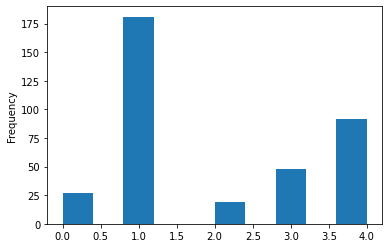

In [16]:
df['tag'].plot.hist()

In [17]:
df[df['tag']==0]

,tag,w,x,y,z,imagen
19,0,0.387713,0.463619,0.108001,0.109333,0078F.jpg
20,0,0.230157,0.513714,0.158379,0.156952,0078F.jpg
22,0,0.447747,0.774095,0.055976,0.060952,0078F.jpg
23,0,0.683454,0.638857,0.075732,0.091048,0078F.jpg
149,0,0.691957,0.737035,0.047584,0.150904,0029F.jpg
153,0,0.527286,0.252952,0.085551,0.048762,0045F.jpg
154,0,0.573277,0.453524,0.048597,0.028571,0045F.jpg
211,0,0.393690,0.340191,0.143161,0.180952,0093F.jpg
212,0,0.414815,0.546857,0.049117,0.081143,0093F.jpg
237,0,0.092381,0.450952,0.060317,0.128571,0011F.jpg


In [18]:
df[df['tag']==0]['imagen'].unique()

array(['0078F.jpg', '0029F.jpg', '0045F.jpg', '0093F.jpg', '0011F.jpg',
       '0102F.jpg', '0083F.jpg', '0104F.jpg', '0128F.jpg'], dtype=object)

In [19]:
df[df['imagen']=='0078F.jpg']

,tag,w,x,y,z,imagen
19,0,0.387713,0.463619,0.108001,0.109333,0078F.jpg
20,0,0.230157,0.513714,0.158379,0.156952,0078F.jpg
21,3,0.089997,0.691048,0.086269,0.052190,0078F.jpg
22,0,0.447747,0.774095,0.055976,0.060952,0078F.jpg
23,0,0.683454,0.638857,0.075732,0.091048,0078F.jpg


In [20]:
df[df['imagen']=='0102F.jpg']

,tag,w,x,y,z,imagen
252,0,0.665488,0.197570,0.061663,0.172096,0102F.jpg
253,0,0.789795,0.150304,0.094633,0.121195,0102F.jpg
254,1,0.500450,0.381354,0.009267,0.015755,0102F.jpg
255,1,0.477639,0.374537,0.025663,0.040903,0102F.jpg
256,1,0.520767,0.560722,0.009267,0.016967,0102F.jpg
257,1,0.533688,0.560570,0.011228,0.017876,0102F.jpg
258,1,0.541708,0.545269,0.011228,0.011513,0102F.jpg
259,1,0.557034,0.525121,0.006950,0.008181,0102F.jpg
260,1,0.548480,0.521788,0.036178,0.031814,0102F.jpg
261,1,0.421233,0.365750,0.013010,0.024542,0102F.jpg


In [21]:
df[df['imagen']=='0083F.jpg']

,tag,w,x,y,z,imagen
307,0,0.820269,0.480952,0.162759,0.179048,0083F.jpg
308,0,0.048959,0.759048,0.075437,0.079619,0083F.jpg
309,0,0.552478,0.729143,0.214428,0.101333,0083F.jpg
310,0,0.871102,0.683048,0.074404,0.066286,0083F.jpg


In [22]:
df[df['tag']==2]

,tag,w,x,y,z,imagen
1,2,0.242454,0.108948,0.022059,0.023069,0111F.jpg
25,2,0.919702,0.180375,0.023929,0.046307,0185F.jpg
155,2,0.474818,0.541143,0.036954,0.024000,0045F.jpg
157,2,0.569183,0.077333,0.070972,0.033905,0012F.jpg
158,2,0.645817,0.220762,0.079277,0.042667,0012F.jpg
159,2,0.558612,0.227429,0.084562,0.036952,0012F.jpg
160,2,0.563520,0.310095,0.074747,0.034667,0012F.jpg
169,2,0.194592,0.246742,0.030431,0.050337,0024F.jpg
172,2,0.699297,0.760225,0.033997,0.059326,0024F.jpg
194,2,0.582078,0.370986,0.030606,0.039303,006F.jpg


In [23]:
df[df['tag']==2]['imagen'].unique()

array(['0111F.jpg', '0185F.jpg', '0045F.jpg', '0012F.jpg', '0024F.jpg',
       '006F.jpg', '0154F.jpg', '0114F.jpg', '0051F.jpg', '0102F.jpg',
       '0047F.jpg', '0133F.jpg', '0108F.jpg', '0132F.jpg'], dtype=object)

In [84]:
df[df['imagen']=='0024F.jpg']

,tag,w,x,y,z,imagen
169,2,0.194592,0.246742,0.030431,0.050337,0024F.jpg
170,4,0.227762,0.090337,0.022585,0.054831,0024F.jpg
171,4,0.208980,0.095506,0.016404,0.037303,0024F.jpg
172,2,0.699297,0.760225,0.033997,0.059326,0024F.jpg
173,4,0.523314,0.874607,0.005468,0.011685,0024F.jpg


In [85]:
df[df['imagen']=='0051F.jpg']

,tag,w,x,y,z,imagen
247,2,0.973253,0.178274,0.019495,0.041667,0051F.jpg
248,2,0.959108,0.516964,0.018306,0.042857,0051F.jpg


In [25]:
df[df['imagen']=='0047F.jpg']

,tag,w,x,y,z,imagen
265,3,0.100265,0.658857,0.072869,0.039619,0047F.jpg
266,3,0.344136,0.759048,0.061526,0.045714,0047F.jpg
267,3,0.387445,0.673714,0.067713,0.054857,0047F.jpg
268,1,0.613068,0.272000,0.012718,0.014095,0047F.jpg
269,3,0.679186,0.688571,0.052933,0.060571,0047F.jpg
270,1,0.781795,0.973714,0.014093,0.016762,0047F.jpg
271,1,0.459009,0.978286,0.015811,0.020571,0047F.jpg
272,1,0.464509,0.936571,0.010312,0.014095,0047F.jpg
273,2,0.349946,0.959810,0.022342,0.022476,0047F.jpg


In [ ]:
df[df['imagen']=='0047F.jpg']

In [27]:
### Etiquetas de prueba para las etiquetas 0:
### '0024F.jpg', '0051F.jpg'. '0047F.jpg'

### Etiquetas de prueba para las etiquetas 2:
### , '0078F.jpg', '0102F.jpg','0083F.jpg'

etiquetas1 = df[df['tag']==1]['imagen'].unique()
etiquetas3 = df[df['tag']==3]['imagen'].unique()
etiquetas4 = df[df['tag']==4]['imagen'].unique()

print(len(etiquetas1),len(etiquetas3),len(etiquetas4))

57 36 35


In [34]:
### Para etiquetas 1
list(set(etiquetas1)-{'0024F.jpg', '0051F.jpg','0047F.jpg'}-{'0078F.jpg', '0102F.jpg','0083F.jpg'})

['0044F.jpg',
 '0073F.jpg',
 '0067F.jpg',
 '0104F.jpg',
 '0185F.jpg',
 '0062F.jpg',
 '008F.jpg',
 '0152F.jpg',
 '0039F.jpg',
 '0134F.jpg',
 '0081F.jpg',
 '0126F.jpg',
 '007F.jpg',
 '006F.jpg',
 '0099F.jpg',
 '0052F.jpg',
 '0113F.jpg',
 '0027F.jpg',
 '0103F.jpg',
 '0054F.jpg',
 '0066F.jpg',
 '0199F.jpg',
 '0058F.jpg',
 '0015F.jpg',
 '0166F.jpg',
 '0121F.jpg',
 '0043F.jpg',
 '0085F.jpg',
 '0131F.jpg',
 '0031F.jpg',
 '0117F.jpg',
 '0048F.jpg',
 '0018F.jpg',
 '0193F.jpg',
 '0053F.jpg',
 '0011F.jpg',
 '0111F.jpg',
 '002F.jpg',
 '0127F.jpg',
 '0123F.jpg',
 '0192F.jpg',
 '0072F.jpg',
 '0132F.jpg',
 '0025F.jpg',
 '0187F.jpg',
 '0213F.jpg',
 '0105F.jpg',
 '0055F.jpg',
 '0080F.jpg',
 '0124F.jpg',
 '0098F.jpg',
 '0109F.jpg',
 '0079F.jpg',
 '0133F.jpg',
 '0032F.jpg']

In [35]:
### Para etiquetas 3
list(set(etiquetas3)-{'0024F.jpg', '0051F.jpg','0047F.jpg'}-{'0078F.jpg', '0102F.jpg','0083F.jpg'})

['0089F.jpg',
 '0041F.jpg',
 '0104F.jpg',
 '0185F.jpg',
 '0069F.jpg',
 '0063F.jpg',
 '0134F.jpg',
 '0081F.jpg',
 '0112F.jpg',
 '0016F.jpg',
 '0099F.jpg',
 '0092F.jpg',
 '0113F.jpg',
 '0068F.jpg',
 '0103F.jpg',
 '0128F.jpg',
 '0121F.jpg',
 '0018F.jpg',
 '0053F.jpg',
 '0060F.jpg',
 '0111F.jpg',
 '0077F.jpg',
 '0141F.jpg',
 '002F.jpg',
 '0045F.jpg',
 '0120F.jpg',
 '0132F.jpg',
 '0084F.jpg',
 '004F.jpg',
 '0071F.jpg',
 '0087F.jpg',
 '0079F.jpg',
 '0133F.jpg',
 '0057F.jpg']

In [36]:
### Para etiquetas 4
list(set(etiquetas4)-{'0024F.jpg', '0051F.jpg','0047F.jpg'}-{'0078F.jpg', '0102F.jpg','0083F.jpg'})

['0073F.jpg',
 '0196F.jpg',
 '0067F.jpg',
 '0185F.jpg',
 '0152F.jpg',
 '0039F.jpg',
 '0134F.jpg',
 '0016F.jpg',
 '0038F.jpg',
 '0103F.jpg',
 '0066F.jpg',
 '0136F.jpg',
 '0012F.jpg',
 '0015F.jpg',
 '0166F.jpg',
 '0085F.jpg',
 '0018F.jpg',
 '0193F.jpg',
 '0111F.jpg',
 '0141F.jpg',
 '003F.jpg',
 '0120F.jpg',
 '0072F.jpg',
 '0034F.jpg',
 '0025F.jpg',
 '0118F.jpg',
 '0032F.jpg',
 '0017F.jpg',
 '0055F.jpg',
 '0174F.jpg',
 '004F.jpg',
 '0109F.jpg',
 '0071F.jpg',
 '0057F.jpg']

In [17]:
df['tag'].unique()

array([1, 2, 3, 4, 0])

In [45]:
### Si tomamos una muestra para el set de prueba del 35% entonces 
### 33 imagenes conformaran el set de prueba (test)
94*.35

32.9

In [54]:
num_clases = 5

In [46]:
train_images=get_image_files('img_train')
test_images=get_image_files('img_test')

In [47]:
train_images

(#61) [Path('img_train/0121F.jpg'),Path('img_train/0199F.jpg'),Path('img_train/0025F.jpg'),Path('img_train/0072F.jpg'),Path('img_train/0048F.jpg'),Path('img_train/007F.jpg'),Path('img_train/0068F.jpg'),Path('img_train/0052F.jpg'),Path('img_train/0117F.jpg'),Path('img_train/0044F.jpg')...]

In [71]:
bboxes_cols = ['w','x','y','z']
def get_target_ds(name, df):
    rows = df[df["imagen"] == name]
    return rows["tag"].values, rows[bboxes_cols].values


class Data_prep(torch.utils.data.Dataset):
    def __init__(self, images_path, df):
        super(Data_prep, self).__init__()
        self.images_path = images_path
        self.df = df
    def __len__(self):
        return len(self.images_path)
    
    def __getitem__(self,idx):
        img_path = self.images_path[idx]
        img = cv2.imread(str(img_path), cv2.IMREAD_UNCHANGED)
        target = {}
        labels, boxes = get_target_ds(img_path.name, self.df)
        for b in range(len())
        areas = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        
        iscrowd = torch.zeros((boxes.shape[0],))
        image_id = torch.tensor([idx])
        labels = torch.as_tensor(labels, dtype=torch.float32)
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        areas = torch.as_tensor(areas, dtype=torch.float32)
        
        target["boxes"] = boxes
        target["labels"] = labels
        target["areas"] = areas
        target["iscrowd"] = iscrowd
        target["image_id"] = image_id
        img = F.to_tensor(img)
        return img, target

In [72]:
dataset = Data_prep(train_images, df)

In [81]:
img,target=dataset.__getitem__(3)


In [90]:
bpoxes=df[bboxes_cols].values

In [92]:
bpoxes

array([[0.322836, 0.325942, 0.011049, 0.025167],
       [0.242454, 0.108948, 0.022059, 0.023069],
       [0.738129, 0.144532, 0.060228, 0.063797],
       ...,
       [0.566187, 0.657619, 0.09808 , 0.068571],
       [0.111797, 0.914762, 0.108368, 0.053333],
       [0.959191, 0.858333, 0.067901, 0.05    ]])

In [91]:
[bpoxes[:,2],bpoxes[:,0],bpoxes[:,0],bpoxes[:,0]]

array([0.322836, 0.242454, 0.738129, 0.430064, 0.434773, 0.210119,
       0.355357, 0.708151, 0.951019, 0.501148, 0.792003, 0.743266,
       0.236306, 0.798298, 0.281273, 0.296262, 0.308845, 0.633849,
       0.316522, 0.387713, 0.230157, 0.089997, 0.447747, 0.683454,
       0.971488, 0.919702, 0.290357, 0.228214, 0.755284, 0.442841,
       0.360858, 0.275969, 0.143999, 0.404673, 0.422939, 0.106525,
       0.177009, 0.16496 , 0.15984 , 0.150703, 0.29054 , 0.377862,
       0.431979, 0.455775, 0.476358, 0.495334, 0.47937 , 0.429168,
       0.342113, 0.342708, 0.776339, 0.788095, 0.849554, 0.848324,
       0.488679, 0.289583, 0.27782 , 0.827194, 0.600725, 0.681081,
       0.827173, 0.209673, 0.258036, 0.279911, 0.620672, 0.71304 ,
       0.760716, 0.2267  , 0.265333, 0.466682, 0.486771, 0.587811,
       0.594843, 0.533549, 0.090743, 0.502126, 0.384234, 0.489968,
       0.81548 , 0.700476, 0.724127, 0.316317, 0.34342 , 0.361845,
       0.387878, 0.576359, 0.174284, 0.237199, 0.440443, 0.427

In [82]:
target

{'boxes': tensor([[0.3618, 0.7864, 0.0190, 0.0223],
         [0.3426, 0.7775, 0.0201, 0.0274],
         [0.2789, 0.7390, 0.0186, 0.0200],
         [0.2629, 0.6627, 0.0057, 0.0149],
         [0.2078, 0.6072, 0.0114, 0.0171],
         [0.1750, 0.7950, 0.0194, 0.0303],
         [0.2844, 0.7743, 0.0083, 0.0137]]),
 'labels': tensor([1., 4., 4., 4., 1., 1., 1.]),
 'areas': tensor([0.2619, 0.2419, 0.1871, 0.1666, 0.1159, 0.1190, 0.2099]),
 'iscrowd': tensor([0., 0., 0., 0., 0., 0., 0.]),
 'image_id': tensor([3])}

In [75]:
target

{'boxes': tensor([[0.1922, 0.8547, 0.0112, 0.0171]]),
 'labels': tensor([1.]),
 'areas': tensor([0.1516]),
 'iscrowd': tensor([0.]),
 'image_id': tensor([1])}

In [53]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# se carga el modelo preentrenado sobre COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

# se reemplaza el clasificador con uno nuevo, que tenga
# num_clases como el numero de clases de nuestro set de datos
in_features = model.roi_heads.box_predictor.cls_score.in_features



Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /Users/hectorarielaragonoliva/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

NameError: name 'num_clases' is not defined

In [55]:
# se remplaza la cabez preentrenada con una nueva
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_clases)

In [56]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator


backbone = torchvision.models.mobilenet_v2(weights="DEFAULT").features
backbone.out_channels = 1280

anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
                                   aspect_ratios=((0.5, 1.0, 2.0),))
roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'],
                                                output_size=7,
                                                sampling_ratio=2)

model = FasterRCNN(backbone,
                   num_classes=5,
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /Users/hectorarielaragonoliva/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

In [57]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


def get_model_instance_segmentation(num_classes):
    # carga una instancia de segmentacion de modelo pre entrenado sobre COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

    # obtiene el número de input de los features para el clasificador
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # se obtiene el numero de inputs para el mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256

    # se reemplaza el mask predicto con uno nuevo y adaptado a las clases que tenemos
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                       hidden_layer,
                                                       num_classes)

    return model

In [66]:
def get_transform(train):
    transforms = []
    transforms.append(T.PILToTensor())
    transforms.append(T.ConvertImageDtype(torch.float))
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    
    return T.Compose(transforms,T.Resize((256,256)))



In [77]:
def collate_double(batch) -> tuple:
    """
    collate funcion para el set de object detection.
    Usada para dataloader.
    """
    x = [sample["x"] for sample in batch]
    y = [sample["y"] for sample in batch]
    x_name = [sample["x_name"] for sample in batch]
    y_name = [sample["y_name"] for sample in batch]
    return x, y, x_name, y_name

def collate_fn(batch):
    return tuple(zip(*batch))


model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True,
                                          num_workers=2, collate_fn= collate_fn)
# Para entrenar
images,targets = next(iter(data_loader))
images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]


In [79]:
targets

[{'boxes': tensor([[0.5692, 0.0773, 0.0710, 0.0339],
          [0.6458, 0.2208, 0.0793, 0.0427],
          [0.5586, 0.2274, 0.0846, 0.0370],
          [0.5635, 0.3101, 0.0747, 0.0347],
          [0.7345, 0.3324, 0.0423, 0.0267],
          [0.6824, 0.3166, 0.0317, 0.0286],
          [0.7840, 0.3210, 0.0355, 0.0282],
          [0.8380, 0.3232, 0.0347, 0.0267]]),
  'labels': tensor([2., 2., 2., 2., 4., 4., 4., 4.]),
  'areas': tensor([0.0216, 0.1009, 0.0903, 0.1346, 0.2116, 0.1874, 0.2191, 0.2382]),
  'iscrowd': tensor([0., 0., 0., 0., 0., 0., 0., 0.]),
  'image_id': tensor([10])},
 {'boxes': tensor([[0.2697, 0.0377, 0.0175, 0.0183],
          [0.9676, 0.5232, 0.0202, 0.0274],
          [0.2449, 0.9210, 0.0178, 0.0255],
          [0.1996, 0.9152, 0.0124, 0.0210],
          [0.1743, 0.9139, 0.0199, 0.0335],
          [0.2382, 0.9781, 0.0205, 0.0309]]),
  'labels': tensor([4., 4., 4., 4., 4., 4.]),
  'areas': tensor([0.0049, 0.4697, 0.2034, 0.1674, 0.1359, 0.2062]),
  'iscrowd': tensor([0.,

In [ ]:
output = model(images,targets) 
model.eval()

x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x) 